# Исследование объявлений о продаже квартир

В нашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно определить рыночную стоимость объектов недвижимости. 

Задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

### задача: 
* **Открыть файл с данными и изучить общую информацию.**
* **Скачать датасет.**
* **Загрузить данные из файла в датафрейм.**
* **Изучить общую информацию о полученном датафрейме.**
* **Построить общую гистограмму для всех числовых столбцов таблицы.**

In [67]:
import pandas as pd
import matplotlib.pyplot as plt

In [68]:
try:
    data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
except:
    data = pd.read_csv('https://code.s3.yandex.net/datasets/real_estate_data.csv', sep='\t')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9700000.0,133.81,2017-03-21T00:00:00,3,3.70,5.0,73.3,3,NaN,...,13.83,NaN,Санкт-Петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,NaN
23695,14,3100000.0,59.00,2018-01-15T00:00:00,3,NaN,5.0,38.0,4,NaN,...,8.50,NaN,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.0
23696,18,2500000.0,56.70,2018-02-11T00:00:00,2,NaN,3.0,29.7,1,NaN,...,NaN,NaN,село Рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23697,13,11475000.0,76.75,2017-03-28T00:00:00,2,3.00,17.0,NaN,12,NaN,...,23.30,2.0,Санкт-Петербург,39140.0,10364.0,2.0,173.0,3.0,196.0,602.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

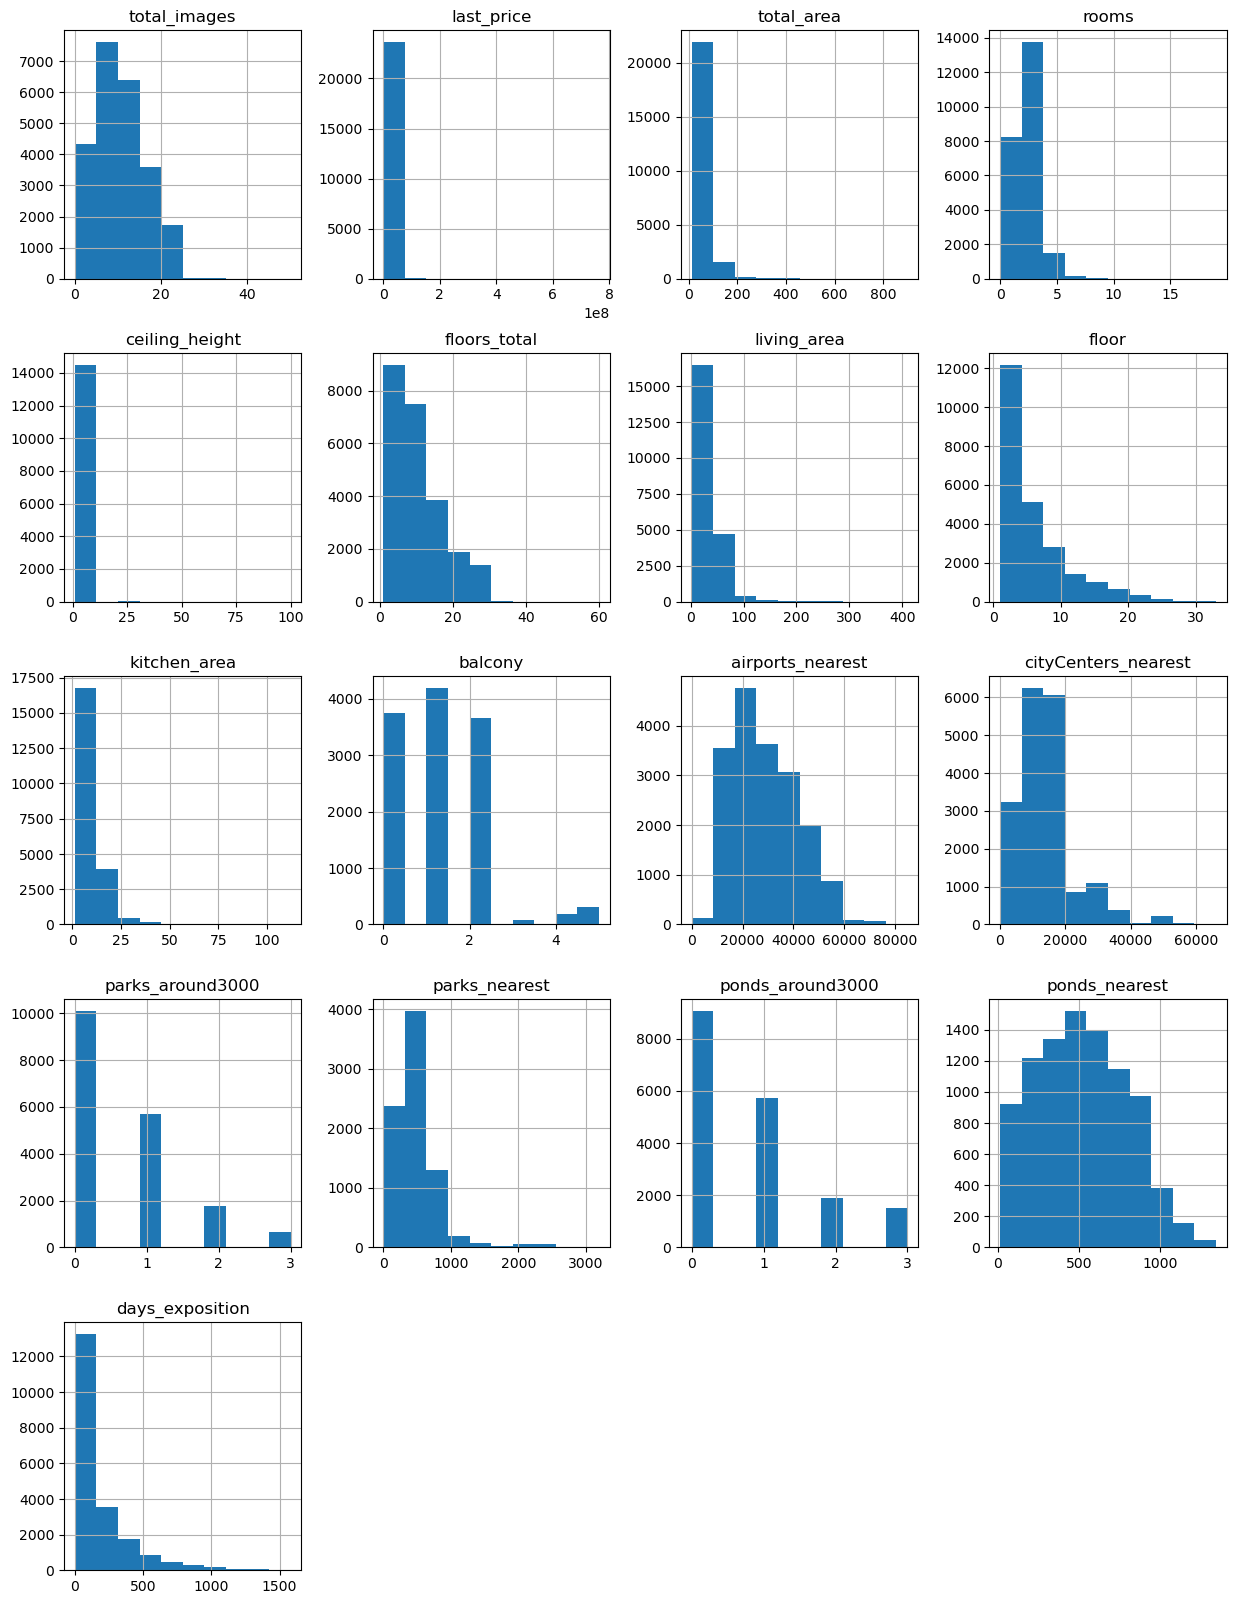

In [69]:
display(data)
data.info()
data.hist(figsize=(15, 20));

По таблице видно, что в некоторых столбцах есть пропуски. Будем смотреть в каких столбцах и разбираться с ними.

### задача: Предобработка данных
* **Найти и изучить пропущенные значения в столбцах.**
* **Определить, в каких столбцах есть пропуски.**
* **Заполнить пропущенные значения там, где это возможно.**
* **Указать причины, которые могли привести к пропускам в данных.**
* **Изучить уникальные значения в столбце с названиями и устранить неявные дубликаты.**

* Чтобы понять, какие столбцы нам нужно будет обработать, необходимо для начала найти, в каких столбцах есть пропуски, и посчитать их количество. Ну и ради интереса посчитаем количество строк в нашей таблице, чтобы понимать, с каким объёмом нам предстоит работать.

In [70]:
# посчитаем количество строк и пропущенных значений в столбцах
print(len(data))
display(data.isna().sum())

23699


total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

 Столбцов с пропусками много, начнем устранять и заменять пропуски, где сможем. Попробуем понять, почему они появились.

* `balcony` — число балконов - вероятно, информация не указана, если балконов просто нет. Заменим пропуски нулями.
* `ceiling_height` — высота потолков - тут встречаются выбивающиеся значения - указана высота потолков 25 м и 32 м. Переведем колонку к типу `'float'`. Что касается пропусков - скорее всего высота не указана там, где высота потолков, как говорится, "стандартная" - владелец мог просто не посчитать нужным указать этот параметр. Также можно предположить, что высота потолков в большинстве квартир примерно одинаковая, по крайней мере, редко выбивается из рамок в 2,5м и 3,5м поэтому логично будет заменить эти пропуски медианным значением.

In [71]:
# Заполним пропуски в столбце с балконами на 0, и приведем данные в столбце 'ceiling_height' к типу 'float'
data['balcony'] = data['balcony'].fillna(0).astype('int')

# Заполним пропуски в столбце 'ceiling_height' медианным значением по этому столбцу
data['ceiling_height'] = data['ceiling_height'].fillna(data['ceiling_height'].median())

* `is_apartment` — апартаменты - этот столбец нам вообще не пригодится, не будем его трогать.
* `days_exposition` — если тут пропуск, то значит квартира не была продана. Не будем заполнять эти пропуски.
* `first_day_exposition` — дата публикации объявления - формат записи даты сложно читается, плюс указаны не нужные нули вместо времени - переведем его в формат datetime, оставим только информацию о дне, месяце и годе.

In [72]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%d')
# print(data['format_day_exposition'].head(30))

`Living_area`, `kitchen_area` —  жилая площадь и площадь кухни. Найдем соотношение средней жилой и средней кухонной площади к средней общей площади, и заменим пропуски этими значениями.

In [73]:
living_avg = data['living_area'].mean() / data['total_area'].mean()
data['living_area'] = data['living_area'].fillna(value=living_avg)
      
kitchen_avg = data['kitchen_area'].mean() / data['total_area'].mean()
data['kitchen_area'] = data['kitchen_area'].fillna(value=kitchen_avg)

`floors_total` - мы не можем знать, сколько может быть этажей в доме, но точно не ниже того этажа, на котором продается квартира, соответственно, заполним пропуски значениями из столбца `floor`.

In [74]:
# заполним пропуски в этажах домов этажами продаваемых квартир
data['floors_total'] = data['floors_total'].fillna(data['floor']).astype('int')

In [75]:
display(data.isna().sum())

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area                 0
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area                0
balcony                     0
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

Видим, что одинаковое количество пропусков - примерно 5,5 тысяч осталось в трех категориях - расстояния до ближайшего аэропорта, до центра города, парка в районе 3км, пруда в районе 3км, аналогичная ситуация с количеством пропусков в столбцах `parks_nearest` и `ponds_nearest`. Информацию по ним мы никак не получим, поэтому просто оставим пропуски как есть.

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v2:</b>
<br>Правка выполнена 👍
</div>

* `locality_name` - название населённого пункта - прежде всего нужно найти все уникальные значения этого столбца - вдруг одни и те же пункты написаны по-разному.

In [76]:
data['locality_name'].unique()

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

Прежде всего, устраним пропуски - название населенного пункта мы все равно не узнаем, заполним их например словом "неизвестно". 
Также приведем все строки к нижнему регистру, чтобы нигде не затерялись прописные буквы.

In [77]:
data['locality_name'] = data['locality_name'].fillna('неизвестно')
data['locality_name'] = data['locality_name'].str.lower()

Далее, видим что по разному названы одни и те же населённые пункты - где-то в названии указан посёлок Мурино, а где-то просто Мурино, то же самое с посёлком Рябово. Также видно, что какие-то слова написаны через "ё". Заменим ё на е, то же самое сделаем с Мурино и Рябово. Это поможет сократить наш список уникальных значений столбца.

In [78]:
data['locality_name'] = data['locality_name'].str.replace('ё', 'е')
data['locality_name'] = data['locality_name'].str.replace('поселок мурино', 'мурино')
data['locality_name'] = data['locality_name'].str.replace('поселок рябово', 'рябово')

С пропусками более-менее разобрались. Теперь нужно посмотреть, что происходит со столбцами, в которых не было пропусков - может, там есть выбивающиеся из общей картины значения, которые могут исказить результаты анализа.

* `total_area` - общая площадь квартиры - построим гистограмму по этому столбцу, чтобы оценить, есть ли выбивающиеся значения:

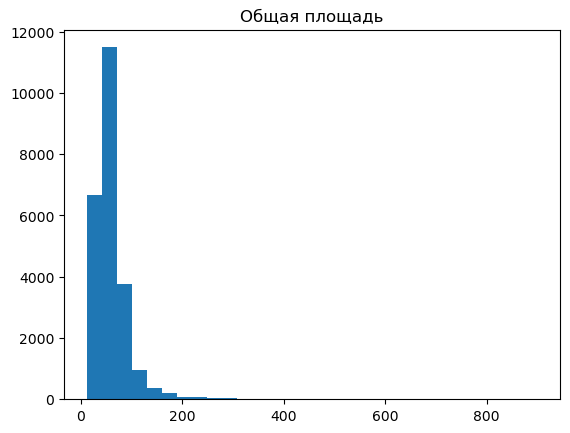

In [79]:
fig, ax = plt.subplots();
ax.hist(data['total_area'], bins=30,);
ax.set_title('Общая площадь');

По гистограмме видно, что квартир с площадью больше 200м практически нет. В таком случае мы удалим мешающие нам значения после 200м.

In [80]:
data = data.drop(index=data[(data['total_area'] > 200)].index)            

Теперь оценим ситуацию со столбцом `last_price`:

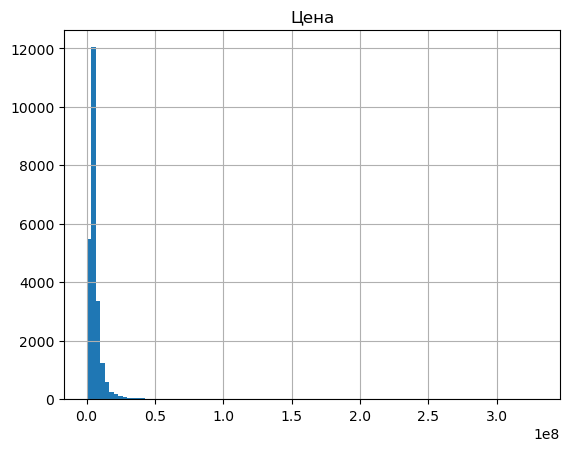

In [81]:
# построим график по столбцу 'last_price'
fig, ax = plt.subplots();
ax.set_title('Цена');
data['last_price'].hist(bins=100);

Видно, что есть аномальные значения со слишком низкой и слишком высокой стоимостью.
  Попробуем оценить общую картину с помощью метода describe.

In [82]:
print(data['last_price'].describe())

count    2.347200e+04
mean     6.026304e+06
std      6.237847e+06
min      1.219000e+04
25%      3.400000e+06
50%      4.600000e+06
75%      6.700000e+06
max      3.300000e+08
Name: last_price, dtype: float64


Среднее в несколько раз меньше медианы, а медиана находится в диапазоне стоимости квартир между 3 и 6 млн. Удалим значения, выбивающиеся из этого диапазона:

In [83]:
data = data.drop(index=data[(data['last_price'] < 3000000) & (data['last_price'] > 7000000)].index)

Теперь выведем гистограмму по столбцу с количеством комнат:

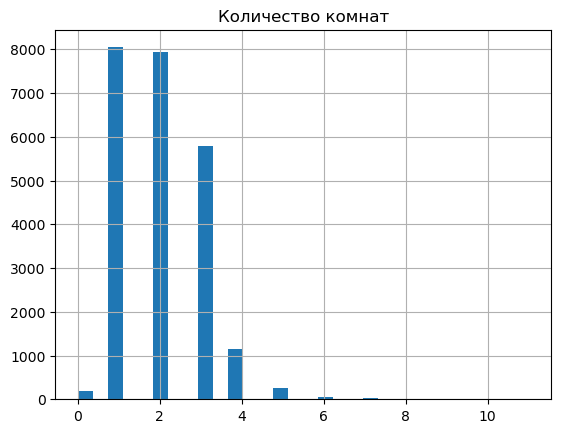

In [85]:
fig, ax = plt.subplots();
ax.set_title('Количество комнат');
data['rooms'].hist(bins=30);

Здесь видно, что крайне малое количество квартир c 5ю комнатами и больше - они и реже всего встречаются, поэтому оставим датафрейм без этих квартир.

In [86]:
data = data.drop(index=data[(data['rooms'] > 5)].index)

### задача: 
#### Посчитать и добавить в таблицу новые столбцы со следующими параметрами:
* **Цена одного квадратного метра.**
* **День недели публикации объявления.**
* **Месяц публикации объявления.**
* **Год публикации объявления.**
* **Тип этажа квартиры (значения — «первый», «последний», «другой»).**
* **Расстояние до центра города в километрах.**

Добавляем колонку с ценой одного квадратного метра.

In [20]:
data['meter_price'] = data['last_price'] / data['total_area']

Добавим в таблицу столбцы с днями недели, месяцами и годами, когда были сделаны публикации.

In [87]:
# добавим в таблицу столбцы с днями недели, месяцами и годами, когда были сделаны публикации
data['weekday_exposition'] = data['first_day_exposition'].dt.weekday
data['month_exposition'] = data['first_day_exposition'].dt.month
data['year_exposition'] = data['first_day_exposition'].dt.to_period('Y')

Добавляем столбец с названиями этажей, и напишем функцию, добавляющую названия этажей в столбец

In [88]:
def what_floor(floor):
        if floor['floor'] == 1:
            return 'первый'
        if floor['floor'] == floor['floors_total']:
            return 'последний'
        return 'другой'
data['what_floor'] = data.apply(what_floor, axis=1)    

In [89]:
data['what_floor'].value_counts()

другой       17170
последний     3325
первый        2891
Name: what_floor, dtype: int64

Переведем метры в километры, и округлим полученные значения

In [90]:
# создадим новый столбец в таблице, и добавим туда переведенные метры в километры
data['cityCenters_avg'] = data['cityCenters_nearest'] / 1000
#и округлим значения в нём
data['cityCenters_avg'] = round(data['cityCenters_avg'], 0)

### задача: 4. Провести исследовательский анализ данных
#### Изучить следующие параметры объектов:
* общая площадь.
* жилая площадь.
* площадь кухни.
* цена объекта.
* количество комнат.
* высота потолков.
* этаж квартиры.
* тип этажа квартиры («первый», «последний», «другой»).
* общее количество этажей в доме.
* расстояние до центра города в метрах.
* расстояние до ближайшего аэропорта.
* расстояние до ближайшего парка.
* день и месяц публикации объявления.

#### Построить отдельные гистограммы для каждого из этих параметров.
* **Описать все наблюдения по этим параметрам.**

Построим гистограмму по общей площади квартир:

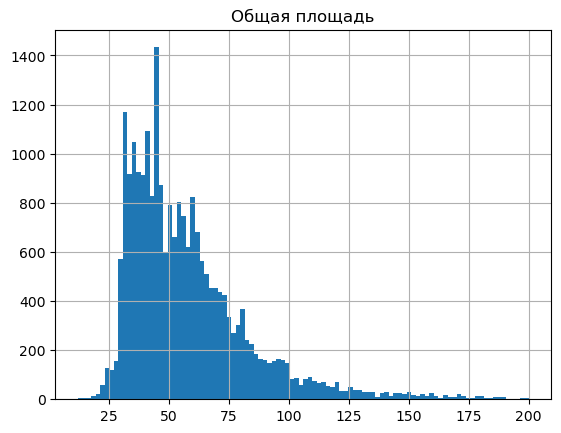

In [25]:
fig, ax = plt.subplots();
ax.set_title('Общая площадь');
data['total_area'].hist(bins=100);

Видно, что общая площадь квартир начинается от 20м, пик значений приходится на область между 30 и 50 метрами, а после 120м данных практически нет.

Попробуем оценить колонку с данными о жилой площади:

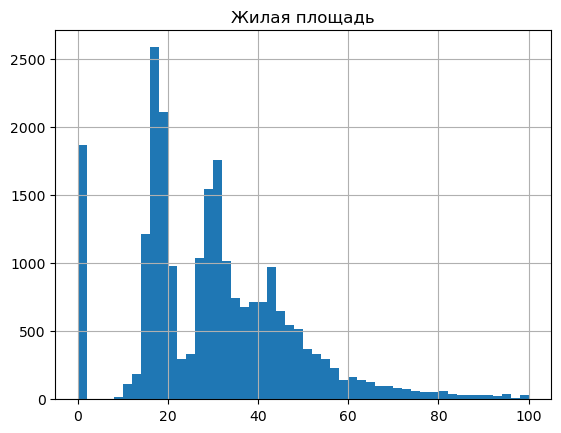

In [26]:
fig, ax = plt.subplots();
ax.set_title('Жилая площадь');
data['living_area'].hist(bins=50, range=(0,100));

Пик в районе 20м возможно показывает однокомнатные квартиры и малогабаритные "двушки", далее идет более плавное распределение площади - сюда могут попасть квартиры с разным количеством комнат, но в большинстве случаев, обычно чем больше комнат, тем больше и площадь, а на гистограмме по количеству комнат мы уже увидели, что таких квартир меньше всего. 

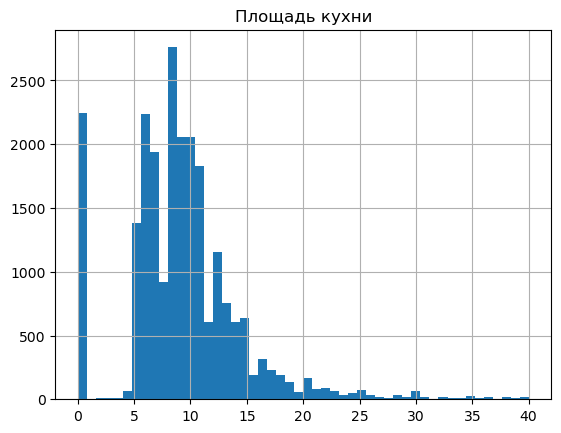

In [27]:
fig, ax = plt.subplots();
ax.set_title('Площадь кухни');
data['kitchen_area'].hist(bins=50, range=(0, 40));

По гистограмме площади кухни видно, что самые высокие значения между 5 и 10 метрами - самые часто встречающиеся по площади кухни  у нас в стране. Дальше показания снижаются - эти кухни принадлежат малочисленным многокомнатным квартирам.

Выведем гистограмму по цене объектов:

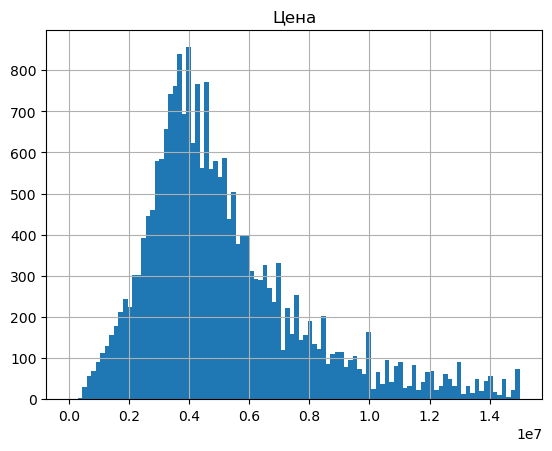

In [28]:
fig, ax = plt.subplots();
ax.set_title('Цена');
data['last_price'].hist(bins=100, range=(0, 15000000));

Здесь видно, что наиболее часто встречающаяся цена квартир - 3-4млн. Скорее всего, это цена однокомнатных квартир в крупных городах, или квартир в населенных пунктах поменьше. 

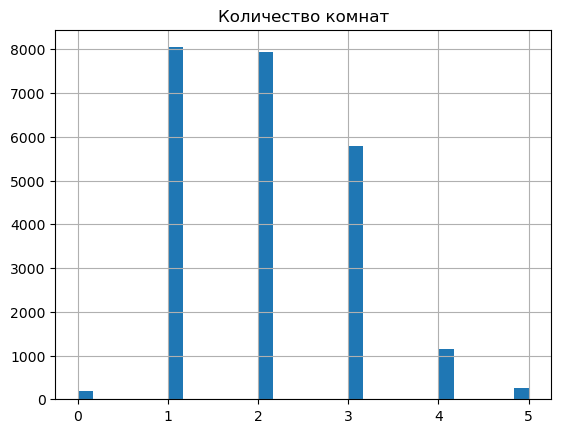

In [29]:
fig, ax = plt.subplots();
ax.set_title('Количество комнат');
data['rooms'].hist(bins=30);

Чаще всего в продаже встречаются однокомнатные и двухкомнатные квартиры, реже - "трёшки". 0 в таблице может означать, что это однокомнатная квартира или студия, может поэтому владелец не посчитал нужным вписать "1".

Построим гистограмму по столбцу с высотой потолков. Квартир с высотой менее 2,4 и более 4 метров в таблице нет, поэтому передадим соответствующие аргументы методу range():

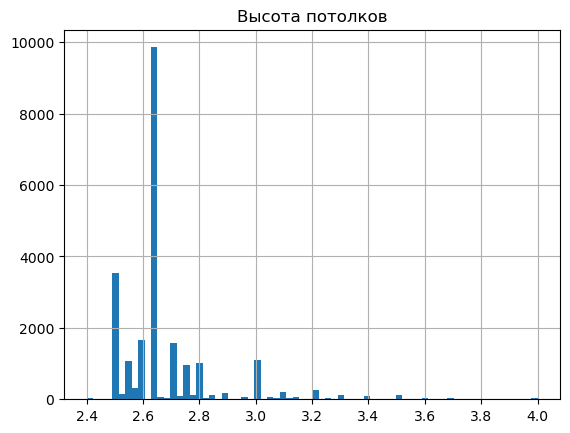

In [30]:
fig, ax = plt.subplots();
ax.set_title('Высота потолков');
data['ceiling_height'].hist(bins=70, range=(2.4, 4));

Пиковые значения пришлись на высоту примерно 2,65м - это скорее всего те пропуски, которые мы заменили, а было их там почти 10000 из 23000 объявлений, почти половина. Если не брать во внимание этот пик, то можно сказать, что квартиры с высотой потолков 2,5м преобладают. Далее 3м - различные исторические дома и "сталинки".

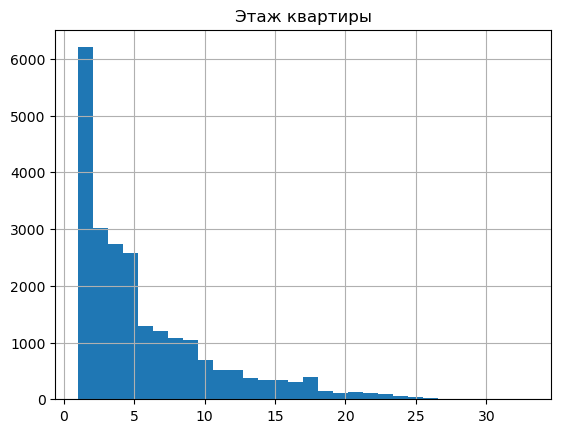

In [31]:
fig, ax = plt.subplots();
ax.set_title('Этаж квартиры');
data['floor'].hist(bins=30);

Видно, что чаще всего встречаются квартиры, находящиеся на этажах с 1 по 5, вероятнее всего, большая часть этих квартир находятся в пятиэтажках. Далее идут квартиры этажом повыше, но их всё меньше - выше 30 этажа квартир на продажу нет.

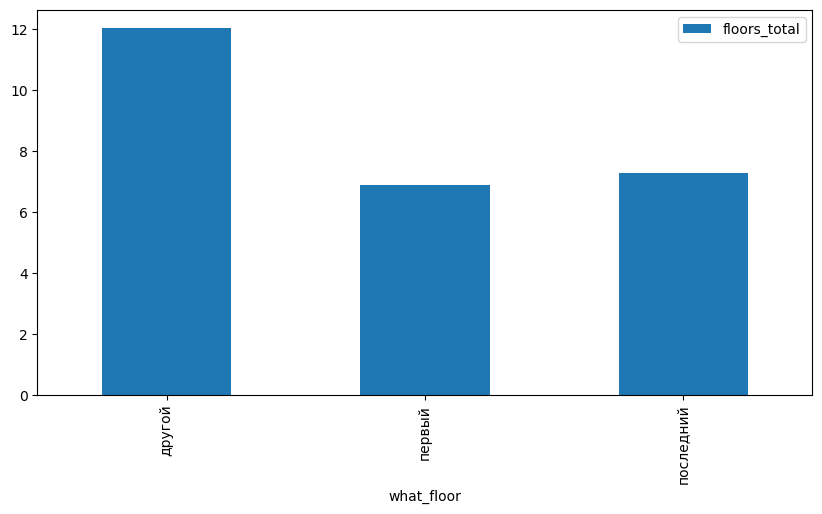

In [32]:
data.pivot_table(index='what_floor', values= 'floors_total').plot(kind= 'bar', figsize=(10, 5));

"Других" этажей много, а первый - он такой один. Квартир на первом этаже в общем больше всех. Столбец со значением "последний" мы не можем корректно оценивать - информация об общей этажности домов  была неполной.

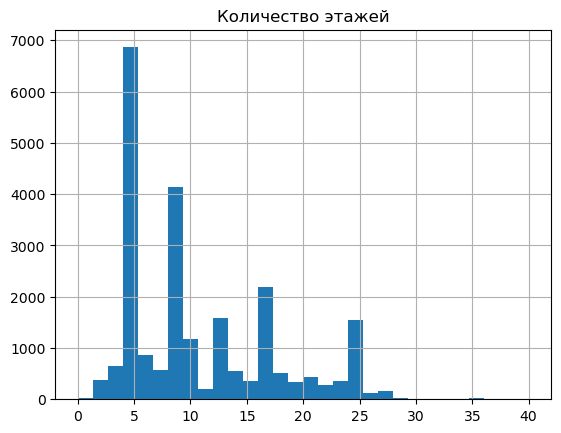

In [33]:
fig, ax = plt.subplots();
ax.set_title('Количество этажей');
data['floors_total'].hist(bins=30, range=(0, 40));

Здесь мы видим подтверждение нашей теории об этажности домов, которую мы описывали выше. Самый пик приходится на пятиэтажки. Это можно объяснить тем, что сейчас пятиэтажки сносят, и многие хотят поскорее продать квартиру в таком доме. Далее, на втором месте явно типовые 9ти-этажки, 12ти, 17ти-этажки - можно сказать что пики в этих местах объясняются большим количеством типовых домов в городе. Имеется довольно высокий пик на цифре 25 - вероятно, это новостройки.

Перейдём к следущей гистограмме - удалённость от центра.

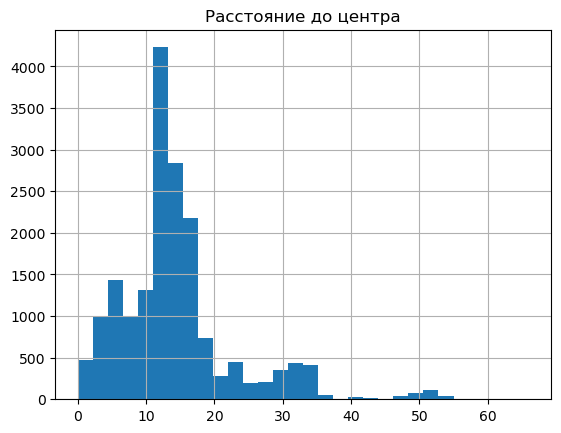

In [34]:
fig, ax = plt.subplots();
ax.set_title('Расстояние до центра');
data['cityCenters_avg'].hist(bins=30);

Видно, что ближе к центру квартир совсем немного - в принципе в ценре любого города жилой площади обычно меньше. Небольшой пик в районе 5км - Если город большой, сюда попадает элитное жильё, если маленький, скорее всего это примерно средняя удаленность квартир от центра. Больше всего предложений в радиусе 10-20 км, скорее всего это квартиры в крупных городах , в средней удаленности от центра, или уже окраины. Значения в области 50км - квартиры на окраинах крупных городов, или в мелких населенных пунктах, где нет центра города как такового, поэтому указано расстояние до центра ближайшего крупного города.

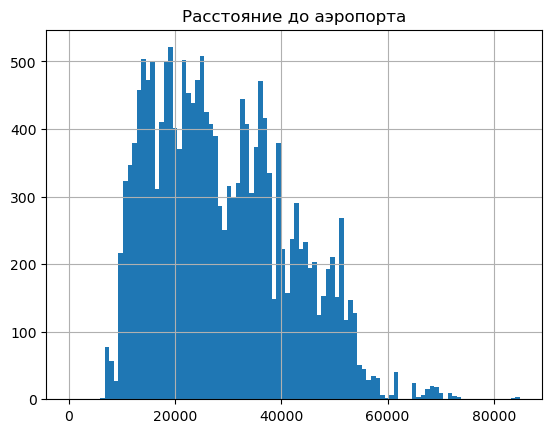

In [35]:
fig, ax = plt.subplots();
ax.set_title('Расстояние до аэропорта');
data['airports_nearest'].hist(bins=100);

На этой гистограмме представлены квартиры с указанием расстояния до ближайшего аэропорта. Самые большие значения находятся в районе 10-30км. Вероятно, это объявления из Санкт-Перербурга - их в принципе в половину больше чем объявлений из других населённых пунктов.

Рассмотрим гистограмму с удалённостью парков:

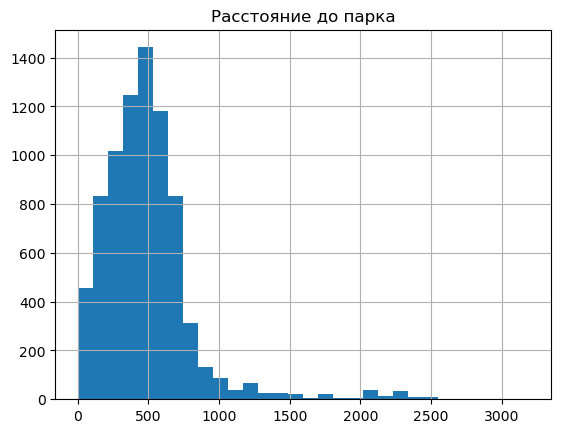

In [36]:
fig, ax = plt.subplots();
ax.set_title('Расстояние до парка');
data['parks_nearest'].hist(bins=30);

Больше всего квартир с удалённостью от парка в 200-700м, самое большое значение на отметке в 500м. Скорее всего это квартиры в городах - даже в небольшом городе есть хотя бы один парк. Минимальные значения - возможно, здесь это такие мелкие населённые пункты, как СНТ, деревни, кооперативы и пр.

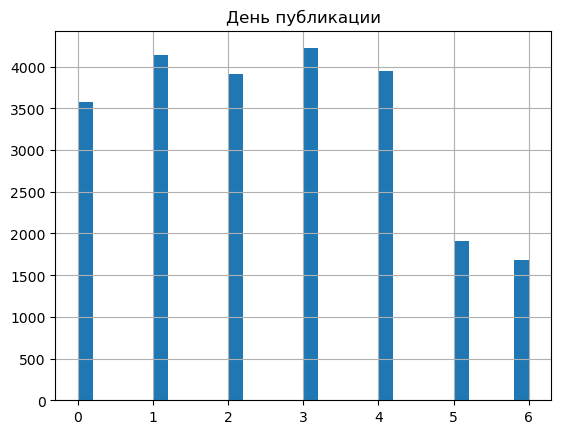

In [37]:
fig, ax = plt.subplots();
ax.set_title('День публикации');
data['weekday_exposition'].hist(bins=30);

Здесь мы видим информацию о дне публикации объявления. Тут всё очевидно -  большую часть объявлений публикуют риэлторы, которые работают по графику 5/2, поэтому показатели в будние дни одинаково высокие.

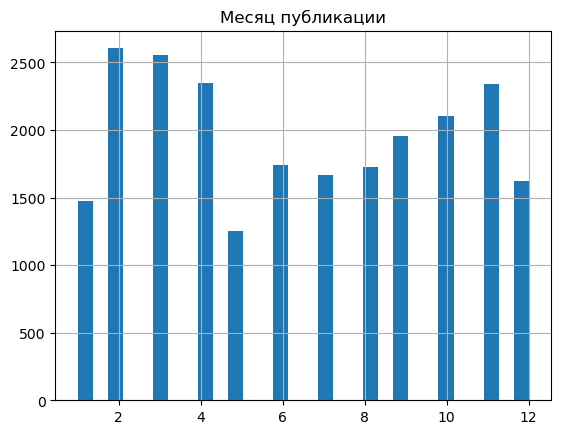

In [38]:
fig, ax = plt.subplots();
ax.set_title('Месяц публикации');
data['month_exposition'].hist(bins=30);

На гистограмме месяца публикации объявления видно, что самые низкие показатели были в январе и мае. Насчет января, возвращаясь к теории о риэлторах, можно предположить, что роль сыграли выходные во время новогодних праздников. Май-Август - время отпусков. Как у риэлторов, так и у владельцев квартир. В декабре многие обычно заняты делами, связанными с концом года - тут не до операций с недвижимостью.

#### Изучить, как быстро продавались квартиры .
* **Построить гистограмму.**
* **Посчитать среднее и медиану.**
* **Описать, сколько времени обычно занимает продажа.**

Построим гистограмму по дням продажи квартир.

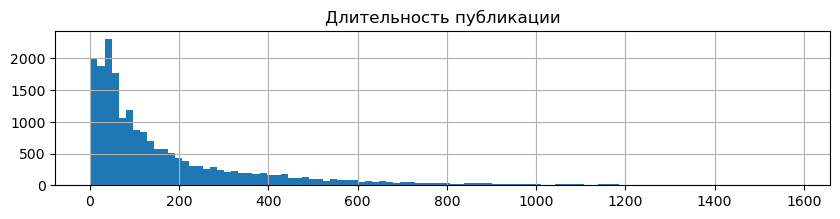

In [39]:
fig, ax = plt.subplots();
ax.set_title('Длительность публикации');
data['days_exposition'].hist(bins=100, figsize=(10, 2));

Крайне много объявлений, находящихся на сайте дольше 600 дней, даже несколько лет. Это аномальные значения, возможно, объявления публикуют мошенники.
   Рассмотрим поближе другую часть гистограммы:

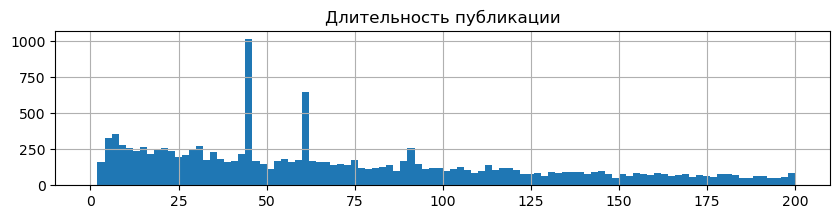

In [40]:
fig, ax = plt.subplots();
ax.set_title('Длительность публикации');
data['days_exposition'].hist(bins=100, range=(0, 200), figsize=(10, 2));

Теперь видно, что основные продажи распределились довольно равномерно, кроме пиковых значений на 45 и 60 день. Скорее всего, это объявления не проданных квартир, а снятых с публикации автоматически или модератором, из-за слишком долгого простаивания или каких-то других правил размещения на сайте.

count    20287.000000
mean       179.476068
std        218.119250
min          1.000000
25%         45.000000
50%         95.000000
75%        229.000000
max       1580.000000
Name: days_exposition, dtype: float64


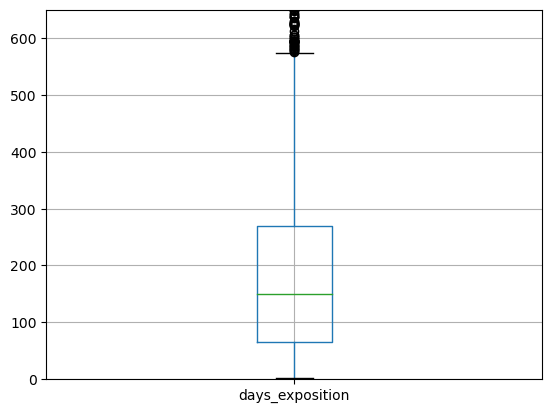

In [41]:
plt.ylim(0, 650)
data.pivot_table(index='last_price', values='days_exposition').boxplot()

print(data['days_exposition'].describe())

По информации, вызванной методом describe и по этому графику видно, что среднее время продажи закрепилось на отметке в 219 дней - в диапазоне примерно между 70 и 290 днями. Необычно долгими можно считать объявления, висящие на сайте дольше 600 дней.

#### Какие факторы больше всего влияют на общую (полную) стоимость объекта?
* **Изучить, зависит ли цена от:**
  - общей площади
  - жилой площади
  - площади кухни
  - количества комнат
  - этажа, на котором расположена квартира (первый, последний, другой).
  - даты размещения (день недели, месяц, год).
* **Построить графики, которые покажут зависимость цены от указанных выше параметров.**

Рассмотрим взаимосвязь цены от размера жилой площади:

             last_price  living_area
last_price     1.000000     0.279434
living_area    0.279434     1.000000


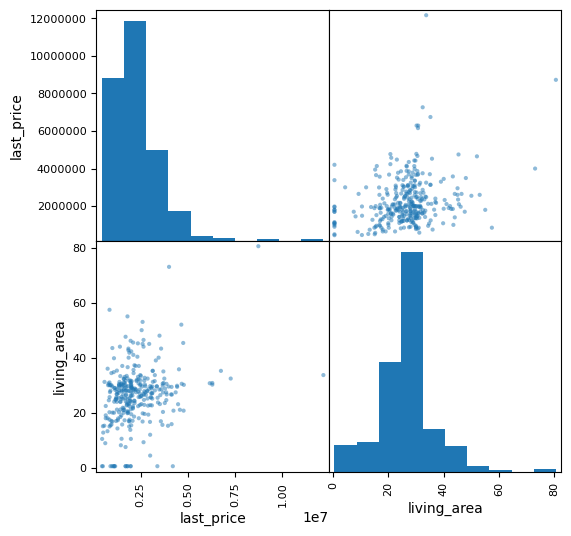

In [42]:
pivot_living = data.pivot_table(index='locality_name', values=['last_price', 'living_area'])
pd.plotting.scatter_matrix(pivot_living, figsize=(6, 6));
print(pivot_living.corr())

Видна взаимосвязь цены и жилой площади - чем выше жилая площадь, тем выше цена.

Следующий пункт - взаимосвязь цены и общей площади квартиры:

            last_price  total_area
last_price    1.000000    0.498887
total_area    0.498887    1.000000


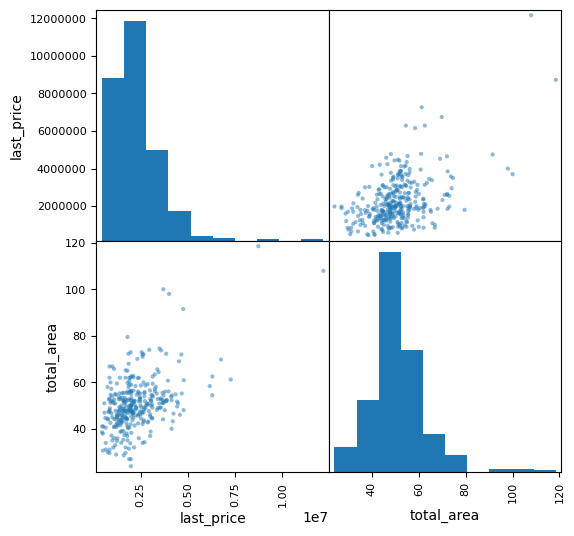

In [43]:
pivot_total = data.pivot_table(index='locality_name', values=['last_price', 'total_area'])
pd.plotting.scatter_matrix(pivot_total, figsize=(6, 6));
print(pivot_total.corr())

Здесь тоже просматривается связь между площадью и стоимостью - чем больше площадь, тем выше стоимость.

Взаимосвязь площади кухни и стоимости квартиры:

             last_price  living_area
last_price     1.000000     0.279434
living_area    0.279434     1.000000


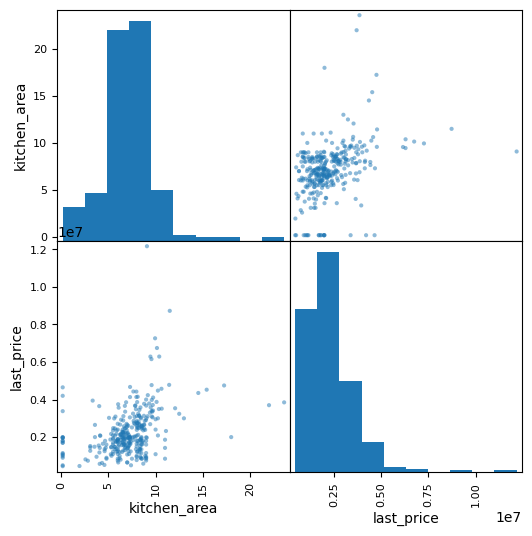

In [44]:
pivot_kitchen = data.pivot_table(index='locality_name', values=['last_price', 'kitchen_area'])
pd.plotting.scatter_matrix(pivot_kitchen, figsize=(6, 6));
print(pivot_living.corr())

Связь есть, но не такая сильная, как на предыдущих графиках - стоимость зависит от площади кухни, но вероятно, в большинстве случаев из-за того, что кухня входит в общую площадь квартиры.

Теперь рассмотрим связь между стоимостью и количеством комнат.

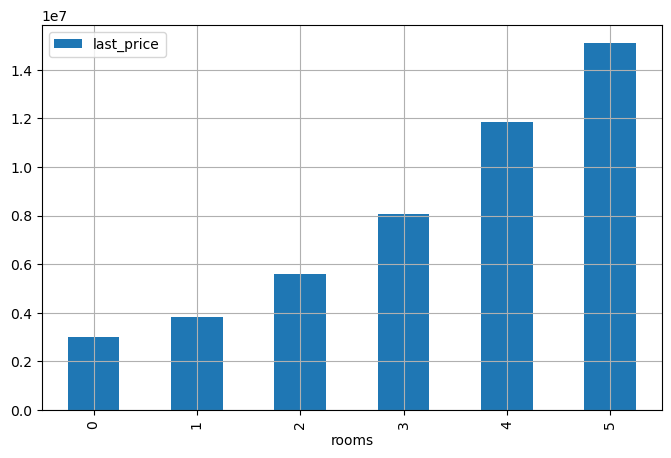

In [91]:
data.pivot_table(index='rooms', values='last_price').plot(kind='bar', grid=True, figsize=(8, 5));

Связь очевидна - чем больше комнат, тем больше площадь и выше цена объекта.

Теперь рассмотрим стоимость квартир в зависимости от этажа.
Видим, что квартиры на первом этаже намного дешевле всех остальных.

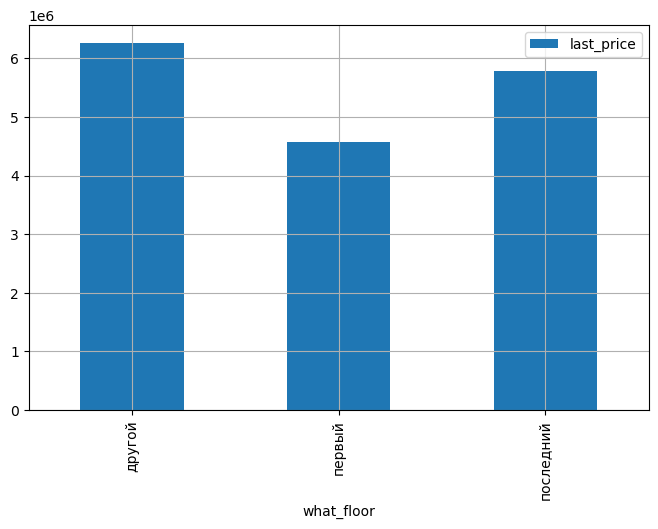

In [92]:
data.pivot_table(index='what_floor', values='last_price').plot(kind='bar', grid=True, figsize=(8, 5)); 

Построим график изменения цен на квартиры по году:

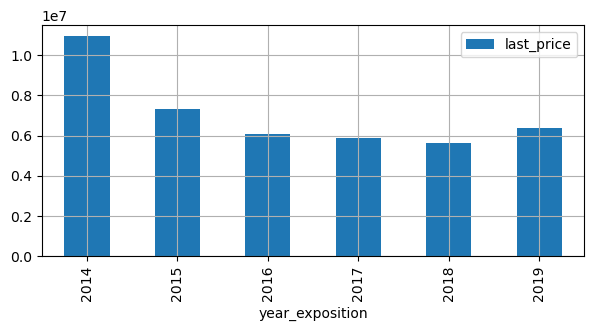

In [47]:
data.pivot_table(index='year_exposition', values='last_price').plot(kind='bar', grid=True, figsize=(7, 3));

Выше всего стоимость квартир была в 2014 году, и далее снижалась - дешевле всего квартиру можно было купить в 2018 году.

Построим графики изменения стоимости по месяцам и дням недели:

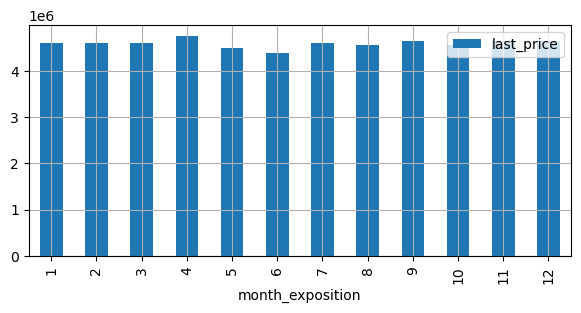

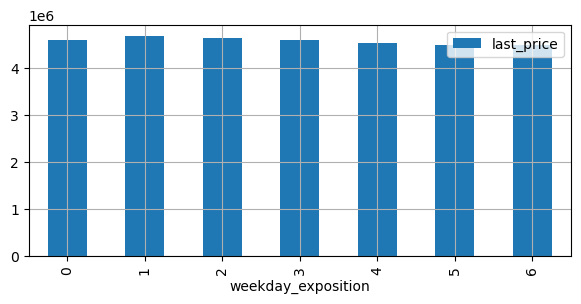

In [48]:
data.pivot_table(index='month_exposition', values='last_price', aggfunc='median').plot(kind='bar', grid=True, figsize=(7, 3));
data.pivot_table(index='weekday_exposition', values='last_price', aggfunc='median').plot(kind='bar', grid=True, figsize=(7, 3));

Судя по этим графикам, от месяца и дня публикации объявления цена почти не зависит.

Видно, что сильный скачок цен был в начале осени 2015 года. Возможно, на это повлияли такие факторы как экономическая ситуация в стране, валютный курс и пр. Дальше скачки цен равномерно происходили каждый год до 2018, после этого до конца 2019г цены не повышались.

#### 
* **Посчитать среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений.**
* **Выделить населённые пункты с самой высокой и низкой стоимостью квадратного метра.**

Посчитаем среднюю цену для каждого квадратного метра и отсортируем список по самым большим значениям:

In [49]:
price_mean = round(data.groupby('locality_name')['meter_price'].mean().\
sort_values(ascending=False),0)
print(price_mean.head(10))

locality_name
зеленогорск          115123.0
санкт-петербург      113560.0
поселок репино       104239.0
пушкин               103213.0
сестрорецк           101912.0
поселок лисий нос    100661.0
кудрово              100253.0
деревня мистолово     98550.0
поселок левашово      96998.0
неизвестно            94310.0
Name: meter_price, dtype: float64


Теперь посмотрим минимальные значения:

In [50]:
print(price_mean.tail(10))

locality_name
деревня ям-тесово          13712.0
деревня сижно              13710.0
деревня бор                13158.0
поселок тесово-4           12931.0
деревня малая романовка    12725.0
поселок совхозный          12629.0
деревня выскатка           12335.0
деревня вахнова кара       11688.0
поселок станции свирь      11481.0
деревня старополье         11206.0
Name: meter_price, dtype: float64


Теперь видно, что дороже всего кв.метр стоит в Зеленогорске и Санкт-Петербурге, а дешевле всего в деревне Старополье.

####  
* **Выделить квартиры в Санкт-Петербурге вычислить среднюю цену каждого километра.**
* **Описать, как стоимость объектов зависит от расстояния до центра города.**

Создадим срез по значению "санкт-петербург" из таблицы, и построим график по средним значениям цены каждого километра:

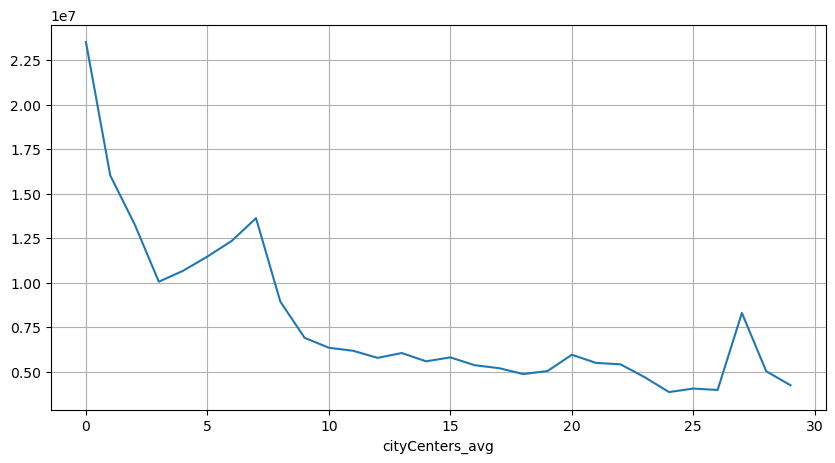

In [51]:
spb_km_price = data.query('locality_name == "санкт-петербург"').groupby('cityCenters_avg')['last_price'].mean()
spb_km_price.plot(grid=True, figsize=(10, 5));

Очевидно, что выше всего стоимость квартир в центре, плюс это квартиры в исторических зданиях. Далее цена снижается равномерно до  точки на 25км.

### Общий вывод

Мы получили данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Провели исследовательский анализ данных этого архива, заметили некоторые особенности, связи и интересные закономерности.

**Рассмотрим наиболее выделяющиеся из архива моменты:**

Прежде всего отметим, что больше всего объявлений в этой базе размещено по городу Санкт-Петербург. Хоть это и очевидно, но всё же, всякое бывает.
* Самые часто встречающиеся квартиры с общей площадью 30-50м, площадью кухни 5-10м, и жилой - 25м. В основном это двухкомнатные  квартиры на первом этаже. 
* Этажность зданий тоже прослеживается достаточно ярко - в основном квартиры продаются в пятиэтажках - скорее всего, люди хотят побыстрее продать недвижимость в домах, которые скоро могут снести.
* Среди общей высоты домов есть цифры, которые встречаются чаще всего. Кроме пятиэтажек, это типовые девятиэтажки, также дома других типов в 12 и 17 этажей. Также довольно много 25ти-этажек - скорее всего это новостройки.
* Высота потолков колеблется от 2,5 до 4 метров, но в среднем квартиры с высотой потолков 2,5 встречаются чаще всего.
* Изучив информацию по дню и месяцу публикации объявлений, приходим к выводу, что примерно одинаковое, и большее количество объявлений публикуется в будние дни, и намного меньше - в выходные. Причина этого в том, что в основном этим занимаются риэлторы с графиком работы 5/2. В выходные объявления разместили сами владельцы. Что касается месяца, то наиболее расслабленными получились январь и май, после мая сюда входят летний сезон и декабрь. В январе сыграли роль новогодние праздники, а в мае и летом у многих отпуск. В декабре же многие торопятся закрыть до конца года какие-то свои дела и не заморачиваются с продажей квартиры.
  
**Можно выделить несколько основных пунктов, влияющих на рыночную стоимость квартир:**
* Этаж - ниже всего стоимость квартир на 1 этаже.
* Чем больше комнат, тем дороже квартира, также общая и жилая площадь сильнее всего влияют на цену квартиры, а площадь кухни это уже второстепенный фактор.
* в 2014 году стоимость недвижимости была самая высокая. Далее она снижалась, и после 2018 года снова стала расти.


* В среднем, объявления снимают с продажи в первые 200 дней с момента публикации. Довольно большое количество снятых с продажи объявлений приходится на 45й и 60й день с момента публикации - скорее всего, модерация на 45й и 60й день удаляет "забытые" объявления, которые давно не обновляли. Также встречаются объявления, аномально долго висящие на сайте, модерация их не удаляет, значит их обновляют, но и квартиры эти тоже не продаются - это подозрительно. Возможно, их разместили мошенники.


* Мы узнали наименьшую и наибольшую стоимость квадратного метра в 10 населённых пунктах с наибольшим количеством объявлений. Также выделили, наименьшая стоимость квадратного метра из списка этих городов принадлежит объявлениям из деревни Старополье, а наибольшая - из Зеленогорска. 
* Мы также посчитали среднюю цену квартир в Санкт-Петербурге в зависимости от удалённости от центра, и выяснили, что самые дорогие квартиры, конечно же, находятся вблизи центра города, плюс, в центре города преобладает количество исторических зданий, это тоже может влиять на цену.